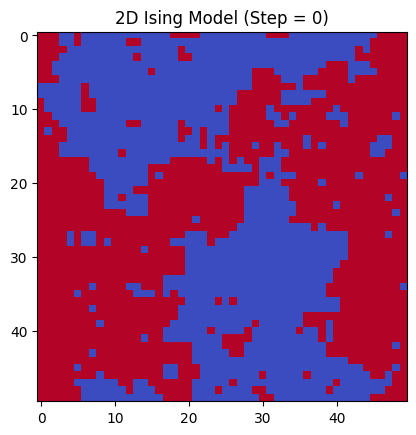

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def initialize_lattice(N):
    """
    Create an NxN lattice with random spins (+1 or -1).
    """
    # Randomly assign spins of +1 or -1
    lattice = 2 * np.random.randint(2, size=(N, N)) - 1
    return lattice

def energy_change(lattice, i, j, J=1.0):
    """
    Compute the energy change dE for flipping the spin at lattice[i, j].
    The Ising Hamiltonian is H = -J * sum(s_i * s_j) over neighbors.
    
    We only need the contribution from the nearest neighbors of spin (i, j).
    """
    N = lattice.shape[0]
    spin = lattice[i, j]
    
    # Periodic boundary conditions (PBC)
    # The neighbors are (i+1, j), (i-1, j), (i, j+1), (i, j-1), wrapping around edges.
    top    = lattice[(i - 1) % N, j]
    bottom = lattice[(i + 1) % N, j]
    left   = lattice[i, (j - 1) % N]
    right  = lattice[i, (j + 1) % N]
    
    # Sum over neighbors
    neighbor_sum = top + bottom + left + right
    
    # Energy change if we flip the spin
    # Current energy contribution of spin i, j: -J * spin * neighbor_sum
    # After flipping spin -> spin' = -spin
    #   contribution = -J * (-spin) * neighbor_sum = J * spin * neighbor_sum
    # So dE = new_energy - old_energy = (J * spin * neighbor_sum) - (-J * spin * neighbor_sum)
    #        = 2 * J * spin * neighbor_sum
    dE = 2 * J * spin * neighbor_sum
    return dE

def metropolis_step(lattice, beta):
    """
    Perform a single Metropolis update sweep on the entire lattice.
    beta = 1/(k_B * T), where T is temperature and k_B=1 for convenience.
    """
    N = lattice.shape[0]
    
    # Attempt to flip each spin once in a random order
    for _ in range(N*N):
        # Pick a random site
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        
        # Calculate energy difference if we flip it
        dE = energy_change(lattice, i, j)
        
        # Metropolis acceptance criterion
        if dE <= 0:
            # If flipping lowers energy, accept
            lattice[i, j] *= -1
        else:
            # Otherwise accept flip with probability exp(-beta * dE)
            if np.random.rand() < np.exp(-beta * dE):
                lattice[i, j] *= -1

def run_simulation(N=50, T=2.2, steps=1000, plot_interval=50):
    """
    Run the Ising model simulation.
    
    N: Lattice size (NxN).
    T: Temperature (in units where k_B=1).
    steps: Total number of Metropolis sweeps.
    plot_interval: Plot/animate the lattice every 'plot_interval' steps.
    """
    beta = 1.0 / T
    
    # Initialize the lattice
    lattice = initialize_lattice(N)
    
    # Setup matplotlib figure
    fig, ax = plt.subplots()
    im = ax.imshow(lattice, cmap='coolwarm', vmin=-1, vmax=1, animated=True)
    ax.set_title("2D Ising Model (Metropolis)")

    def update(frame):
        """
        Update function for FuncAnimation.
        """
        # Perform a number of Metropolis sweeps between frames
        for _ in range(plot_interval):
            metropolis_step(lattice, beta)
        
        # Update the image data
        im.set_array(lattice)
        ax.set_title(f"2D Ising Model (Step = {frame*plot_interval})")
        return [im]

    anim = FuncAnimation(fig, update, frames=steps // plot_interval, interval=200, blit=True)
    plt.show()

    return lattice

if __name__ == "__main__":
    # Parameters
    N = 50         # Lattice dimension
    T = 2.2        # Temperature
    steps = 1000   # Total Metropolis sweeps
    plot_interval = 50
    
    final_lattice = run_simulation(N=N, T=T, steps=steps, plot_interval=plot_interval)


In [ ]:
# You can save your animation by adding:
anim.save('ising_model_animation.mp4', fps=5, extra_args=['-vcodec', 'libx264'])